## Random Forest - Email Spam/Ham

We will be using Random forst technique to evaluate any mail as spam or ham.

### Data Understanding and Cleaning

In [128]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [129]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('spam.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [130]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Data Preparation and Model Building

In [131]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [133]:
# Putting feature variable to X
X = df.drop('spam',axis=1)

# Putting response variable to y
y = df['spam']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [134]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [156]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [157]:
# Making predictions
predictions = rfc.predict(X_test)

In [158]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [159]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       824
           1       0.95      0.82      0.88       557

   micro avg       0.91      0.91      0.91      1381
   macro avg       0.92      0.90      0.90      1381
weighted avg       0.91      0.91      0.91      1381



In [160]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[800  24]
 [100 457]]


In [161]:
print(accuracy_score(y_test,predictions))

0.9102099927588704


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


<hr>

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [162]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 60, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 60, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='f1', verbose=0)

In [163]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014169,0.001179,0.002393,0.000488,2,{'max_depth': 2},0.826966,0.791762,0.828194,0.804545,...,0.814216,0.014035,12,0.821670,0.831661,0.833239,0.823860,0.830536,0.828193,0.004567
1,0.020166,0.000405,0.001996,0.000001,7,{'max_depth': 7},0.917355,0.895397,0.905812,0.897119,...,0.902512,0.008287,11,0.930928,0.935385,0.935267,0.933539,0.925945,0.932213,0.003524
2,0.025940,0.001539,0.002202,0.000413,12,{'max_depth': 12},0.911340,0.900415,0.920319,0.910569,...,0.911173,0.006387,9,0.969512,0.971516,0.963757,0.970588,0.976251,0.970325,0.004010
3,0.029114,0.000749,0.002202,0.000395,17,{'max_depth': 17},0.928717,0.918033,0.914851,0.909091,...,0.917545,0.006391,5,0.987952,0.991487,0.989960,0.986398,0.989950,0.989149,0.001776
4,0.029526,0.002150,0.002596,0.000489,22,{'max_depth': 22},0.918919,0.903491,0.934132,0.921212,...,0.919468,0.009733,1,0.992986,0.994514,0.994006,0.992489,0.989980,0.992795,0.001580


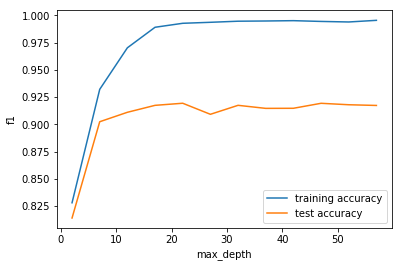

In [164]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("f1")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.
Max_depth = 12

<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [153]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 40)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 40)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [154]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.141621,0.010283,0.009177,0.001162,100,{'n_estimators': 100},0.906383,0.882609,0.896694,0.880851,...,0.893267,0.009942,14,0.902002,0.906596,0.898089,0.903499,0.900474,0.902132,0.002860
1,0.192293,0.009186,0.011174,0.000397,140,{'n_estimators': 140},0.902954,0.883117,0.907975,0.871795,...,0.890759,0.013201,30,0.899421,0.904963,0.898178,0.903602,0.898197,0.900872,0.002853
2,0.249547,0.010006,0.013364,0.000489,180,{'n_estimators': 180},0.898734,0.889849,0.908722,0.880342,...,0.893876,0.009467,8,0.903361,0.906878,0.906878,0.903123,0.907271,0.905502,0.001852
3,0.305006,0.005251,0.017141,0.000989,220,{'n_estimators': 220},0.898305,0.885529,0.897541,0.885106,...,0.890602,0.006004,31,0.901215,0.905363,0.906780,0.904485,0.899258,0.903420,0.002771
4,0.353865,0.006962,0.019341,0.000785,260,{'n_estimators': 260},0.909091,0.887446,0.906122,0.875536,...,0.894748,0.012316,3,0.902375,0.904687,0.900000,0.901648,0.903633,0.902469,0.001616


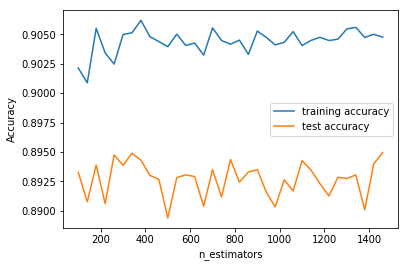

In [155]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("f1")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [107]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,32,40]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14, 20, 24, 32, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [108]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014960,0.000631,0.002593,0.000489,4,{'max_features': 4},0.773810,0.768924,0.828685,0.741036,...,0.781846,0.029376,7,0.775896,0.770149,0.831841,0.777114,0.801990,0.791398,0.022994
1,0.021742,0.001596,0.002194,0.000399,8,{'max_features': 8},0.853175,0.796813,0.820717,0.804781,...,0.823228,0.021190,6,0.836653,0.856716,0.810945,0.846766,0.847761,0.839768,0.015752
2,0.029510,0.001185,0.002793,0.000399,14,{'max_features': 14},0.853175,0.812749,0.884462,0.832669,...,0.843151,0.024294,4,0.852590,0.869652,0.870647,0.860697,0.854726,0.861662,0.007428
3,0.040896,0.002448,0.002793,0.000400,20,{'max_features': 20},0.865079,0.820717,0.876494,0.840637,...,0.853494,0.020124,2,0.858566,0.845771,0.858706,0.855721,0.883582,0.860469,0.012486
4,0.043683,0.002309,0.002593,0.000489,24,{'max_features': 24},0.865079,0.824701,0.868526,0.848606,...,0.851904,0.015502,3,0.870518,0.876617,0.859701,0.863682,0.867662,0.867636,0.005789


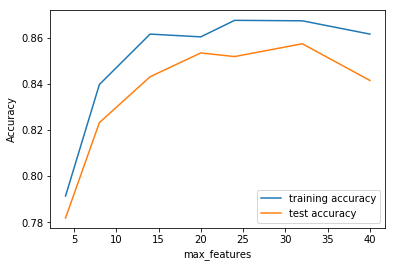

In [109]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("f1")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [110]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 550, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 550, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [82]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018371,0.002054,0.001980,0.000014,100,{'min_samples_leaf': 100},0.893023,0.911491,0.888199,0.880435,...,0.895342,0.011019,1,0.895922,0.917314,0.892857,0.901009,0.904928,0.902406,0.008530
1,0.013570,0.000481,0.001803,0.000387,150,{'min_samples_leaf': 150},0.871318,0.858696,0.895963,0.895963,...,0.879193,0.014638,3,0.878058,0.888199,0.889752,0.908773,0.891735,0.891303,0.009928
2,0.013167,0.000398,0.001796,0.000399,200,{'min_samples_leaf': 200},0.896124,0.875776,0.868012,0.872671,...,0.876398,0.010235,4,0.891262,0.874612,0.875388,0.881599,0.877765,0.880125,0.006076
3,0.012176,0.000395,0.001801,0.000403,250,{'min_samples_leaf': 250},0.900775,0.888199,0.877329,0.860248,...,0.879814,0.013807,2,0.888544,0.885481,0.879658,0.875000,0.876989,0.881134,0.005114
4,0.011576,0.000480,0.001982,0.000017,300,{'min_samples_leaf': 300},0.854264,0.855590,0.872671,0.841615,...,0.854037,0.010658,5,0.854757,0.847438,0.865683,0.867624,0.834692,0.854039,0.012154


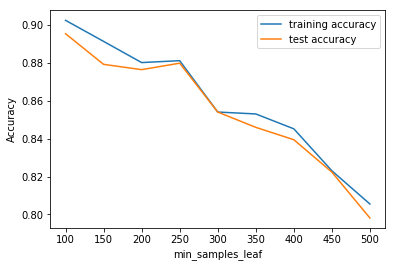

In [83]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("f1")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. The convergence happens when min_samples_leaf = 250

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [115]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 800, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="f1")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 800, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [116]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023930,0.002676,0.002203,0.000395,200,{'min_samples_split': 200},0.833333,0.840637,0.892430,0.840637,...,0.857489,0.024087,3,0.868526,0.895522,0.883582,0.890547,0.885572,0.884750,0.009109
1,0.021351,0.001834,0.002383,0.000485,250,{'min_samples_split': 250},0.880952,0.864542,0.904382,0.848606,...,0.877383,0.019272,1,0.886454,0.885572,0.889552,0.874627,0.884577,0.884157,0.005048
2,0.021746,0.003699,0.001987,0.000013,300,{'min_samples_split': 300},0.873016,0.840637,0.848606,0.844622,...,0.852696,0.011453,4,0.859562,0.895522,0.851741,0.871642,0.867662,0.869226,0.014825
3,0.019564,0.001367,0.001997,0.000003,350,{'min_samples_split': 350},0.880952,0.856574,0.864542,0.860558,...,0.862256,0.010738,2,0.867530,0.882587,0.847761,0.876617,0.879602,0.870819,0.012584
4,0.018745,0.001167,0.002000,0.000018,400,{'min_samples_split': 400},0.841270,0.820717,0.880478,0.864542,...,0.848733,0.021185,7,0.860558,0.840796,0.869652,0.879602,0.857711,0.861664,0.012945


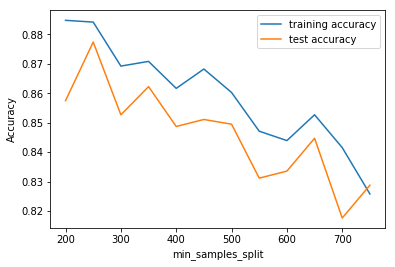

In [117]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("f1")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [139]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10,12],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300,500,1500], 
    'max_features': [5, 10,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1,verbose = 1)

In [140]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 20.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10, 12], 'min_samples_leaf': range(100, 400, 100), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300, 500, 1500], 'max_features': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [141]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.,'using',grid_search.best_params_)

We can get accuracy of 0.9152173913043479 using {'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [144]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [145]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
# predict
predictions = rfc.predict(X_test)

In [147]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [148]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       824
           1       0.95      0.81      0.87       557

   micro avg       0.91      0.91      0.91      1381
   macro avg       0.92      0.89      0.90      1381
weighted avg       0.91      0.91      0.90      1381



In [149]:
print(confusion_matrix(y_test,predictions))

[[799  25]
 [106 451]]


As recall value is substantially low compared to the non-regularized random forest implementation, we will go ahead with the
basic parameter grid. We will not go with the hyperparameters